In [1]:
import os
print(os.getcwd())

c:\Users\jonat\Documents\CODE-PROJECTS\text_to_discocirc


In [2]:
from lambeq import BobcatParser

c:\Users\jonat\py-venvs\lambeq-venv\lib\site-packages\lambeq\text2diagram\ccg_parser.py:25: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [44]:
parser = BobcatParser(verbose='suppress')

### Example: "Alice loves Bob"

In [45]:
ccg_tree = parser.sentence2tree("Alice loves Bob")
print(ccg_tree.deriv())

Alice   loves   Bob
═════  ═══════  ═══
  n    (s\n)/n   n 
──<U>           <U>
  n              n 
       ───────────>
           s\n     
──────────────────<
         s         


In [46]:
from discocirc.expr.ccg_to_expr import ccg_to_expr

In [47]:
expr1 = ccg_to_expr(ccg_tree)
expr1

    loves      Bob       
═════════════  ═══       
(n → (n → s))   n   Alice
──────────────────  ═════
     (n → s)          n  
─────────────────────────
            s            

In [48]:
from discocirc.expr.expr_to_diag import expr_to_diag

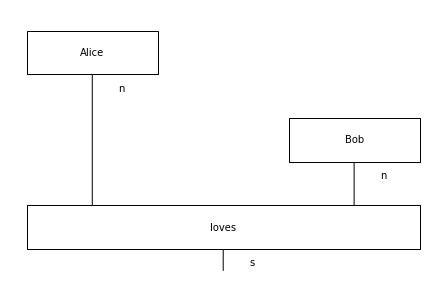

In [49]:
expr_to_diag(expr1).draw()

In [50]:
from discocirc.expr.type_expand import type_expand

In [51]:
expr2 = type_expand(expr1)
expr2

      loves        Bob       
═════════════════  ═══       
(n → (n → n @ n))   n   Alice
──────────────────────  ═════
     (n → n @ n)          n  
─────────────────────────────
            n @ n            

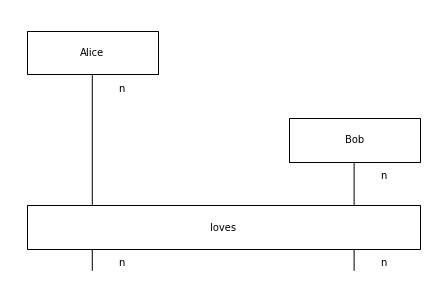

In [52]:
expr_to_diag(expr2).draw()

### Example: "Alice quickly ran"

In [53]:
ccg_tree = parser.sentence2tree("Alice quickly ran")
print(ccg_tree.deriv())

Alice    quickly    ran
═════  ═══════════  ═══
  n    (s\n)/(s\n)  s\n
──<U>  ───────────────>
  n          s\n       
──────────────────────<
           s           


In [54]:
expr1 = ccg_to_expr(ccg_tree)
expr1

      quickly          ran         
═══════════════════  ═══════       
((n → s) → (n → s))  (n → s)  Alice
────────────────────────────  ═════
          (n → s)               n  
───────────────────────────────────
                 s                 

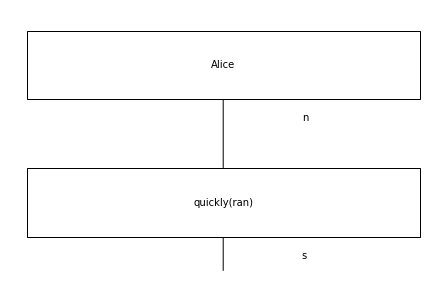

In [55]:
expr_to_diag(expr1).draw()

In [56]:
from discocirc.diag.frame import Frame
decompose_functor = Frame.get_decompose_functor()

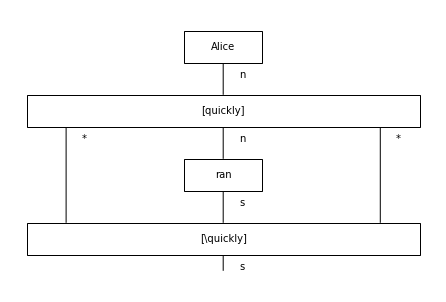

In [57]:
decompose_functor(expr_to_diag(expr1)).draw()

In [58]:
expr2 = type_expand(expr1)
expr2

      quickly          ran         
═══════════════════  ═══════       
((n → n) → (n → n))  (n → n)  Alice
────────────────────────────  ═════
          (n → n)               n  
───────────────────────────────────
                 n                 

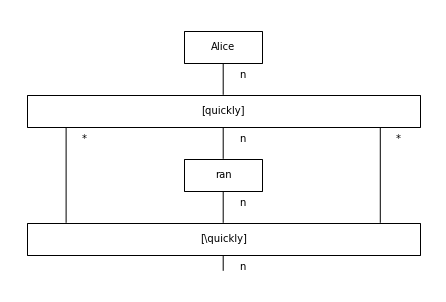

In [59]:
decompose_functor(expr_to_diag(expr2)).draw()

### Example: "I really like Bob"

In [60]:
ccg_tree = parser.sentence2tree("I really like Bob")
expr1 = ccg_to_expr(ccg_tree)

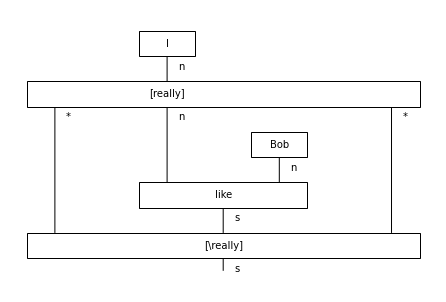

In [61]:
decompose_functor(expr_to_diag(expr1)).draw()

In [62]:
from discocirc.expr.pull_out import pull_out

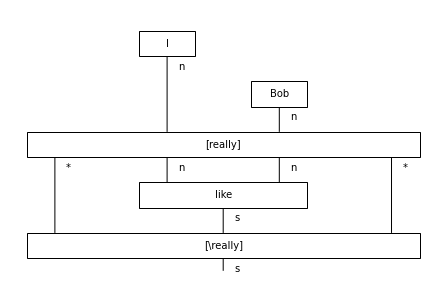

In [63]:
expr2 = pull_out(expr1)
decompose_functor(expr_to_diag(expr2)).draw()

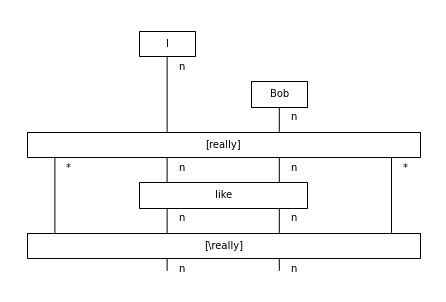

In [64]:
expr3 = type_expand(expr2)
decompose_functor(expr_to_diag(expr3)).draw()

### Example: "Bob who loves Alice runs"

In [65]:
ccg_tree = parser.sentence2tree("Bob who loves Alice runs")
expr1 = ccg_to_expr(ccg_tree)

In [66]:
expr1

                                  loves      Alice     
                              ═════════════  ═════     
                 who          (n → (n → s))    n       
         ═══════════════════  ────────────────────     
         ((n → s) → (n → n))        (n → s)         Bob
         ─────────────────────────────────────────  ═══
 runs                     (n → n)                    n 
═══════  ──────────────────────────────────────────────
(n → s)                        n                       
───────────────────────────────────────────────────────
                           s                           

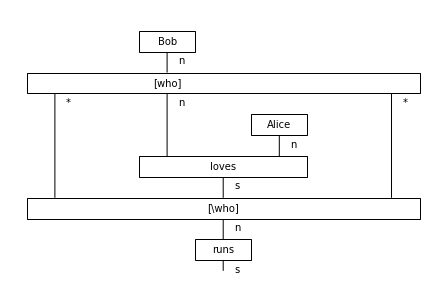

In [67]:
decompose_functor(expr_to_diag(expr1)).draw()

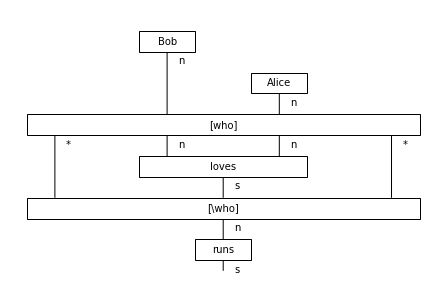

In [68]:
expr2 = pull_out(expr1)
decompose_functor(expr_to_diag(expr2)).draw()

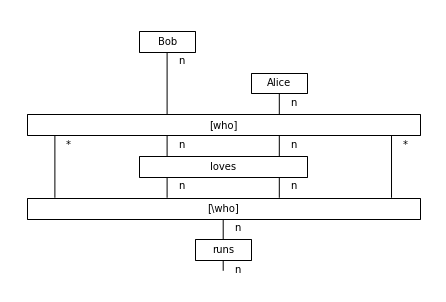

In [69]:
expr3 = type_expand(expr2)
decompose_functor(expr_to_diag(expr3)).draw()

In [70]:
from discocirc.expr.type_expand import n_expand

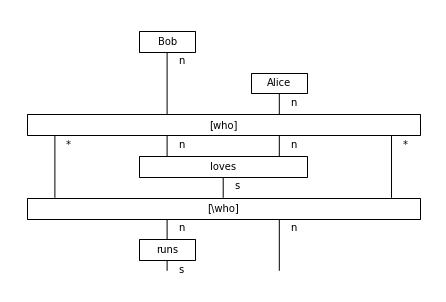

In [71]:
expr4 = n_expand(expr2)
decompose_functor(expr_to_diag(expr4)).draw()

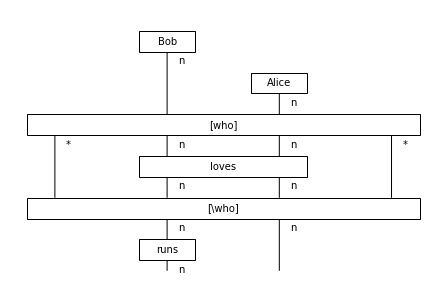

In [72]:
expr5 = type_expand(expr4)
decompose_functor(expr_to_diag(expr5)).draw()

### Example: complicated sentence

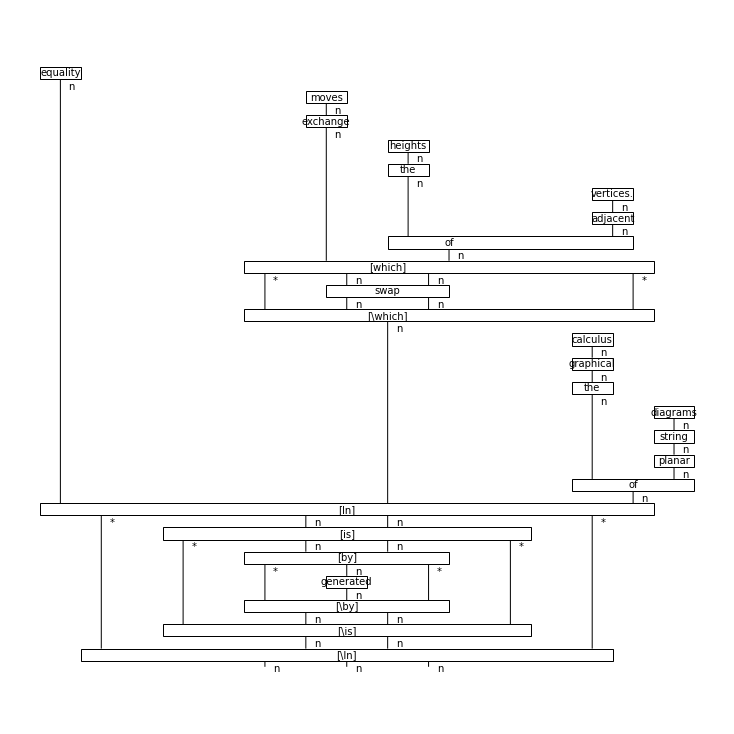

In [73]:
expr = ccg_to_expr(parser.sentence2tree("In the graphical calculus of planar string diagrams , equality is generated by exchange moves , which swap the heights of adjacent vertices."))
decompose_functor(expr_to_diag(type_expand(pull_out(expr)))).draw(figsize=(10,10))

With more complicated sentences, there are currently some bugs and special cases which break our code ... we are working on it

### Example: multiple sentences, bAbI task example

In [74]:
from discocirc.pipeline.text_to_circuit import sentence_list_to_circuit

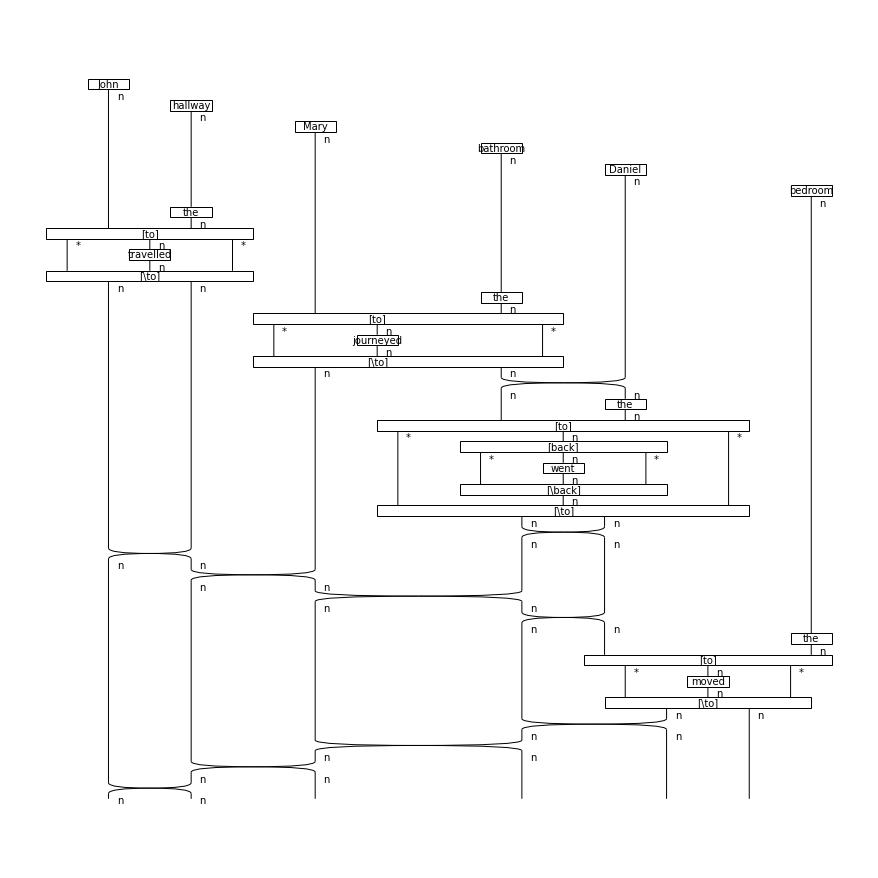

In [75]:
sentence_list_to_circuit(["John travelled to the hallway",
"Mary journeyed to the bathroom",
"Daniel went back to the bathroom",
"John moved to the bedroom"]).draw(figsize=(12,12))

### Example: intra-language independence

In [76]:
ccg_tree = parser.sentence2tree("Before looking around , he saw the letter")

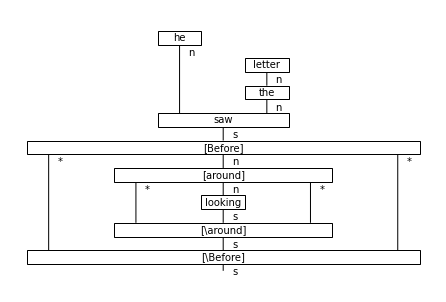

In [77]:
decompose_functor(expr_to_diag(ccg_to_expr(ccg_tree))).draw()

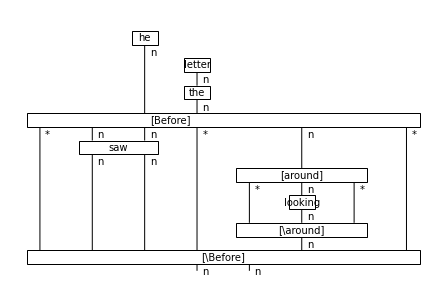

In [78]:
decompose_functor(expr_to_diag(type_expand(pull_out(ccg_to_expr(ccg_tree))))).draw()

In [79]:
ccg_tree = parser.sentence2tree("He saw the letter before looking around")

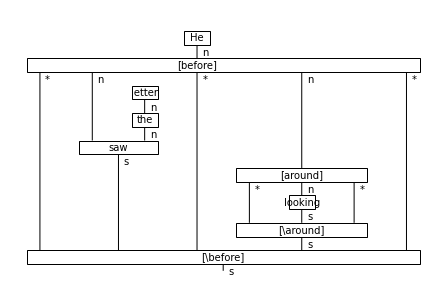

In [80]:
decompose_functor(expr_to_diag(ccg_to_expr(ccg_tree))).draw()

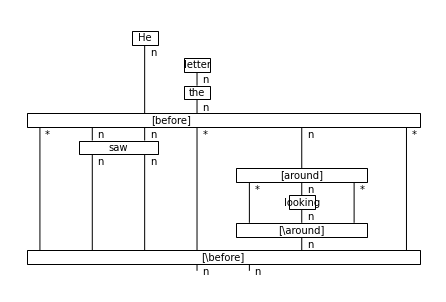

In [81]:
decompose_functor(expr_to_diag(type_expand(pull_out(ccg_to_expr(ccg_tree))))).draw()